# **Sawtooth Wave**
This notebook provides an example of how to create a a sawtooth signal through additive synthesys, using the folowing mathmatical expression:
$$
s(t) = \sum_{n=1}^{\infty} \frac{A_0}{n}\sin(2 \pi n f t) = A_0 \sin (2 \pi ft) + \frac{A_0}{2} \sin (2 \pi 2ft) + \frac{A_0}{3} \sin (2 \pi 3ft) + ...
$$

---

In [11]:
import numpy as np
from scipy.io.wavfile import write
from IPython.display import Audio

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
sr        = 44100   # sample rate
dr        = 1       # duration in seconds
base_fq   = 220     # base frequency in Hz
num_hrm   = 50      # number of harmonics
amp       = 0.5     # amplitude 

timev  = np.linspace(0, dr, dr*sr)    # creates a time vector
harm   = np.arange(1, num_hrm+1)      # creates an array with a range 0 - nth harmonic
sawt   = np.zeros(dr*sr)              # creates an array of zeros to then add each of the signals


for n in harm:
    sine   = amp/n * np.sin(2* np.pi * n * base_fq * timev) # creates a sine
    sawt  += sine                 # adds each sine to create a sawtooth wave
        
sig_fft  = np.fft.fft(sawt)                         # fast fourier transform
sig_fftn = np.abs(sig_fft) / sr*2                   # signal normalization

---

#### **Plotting the signal**

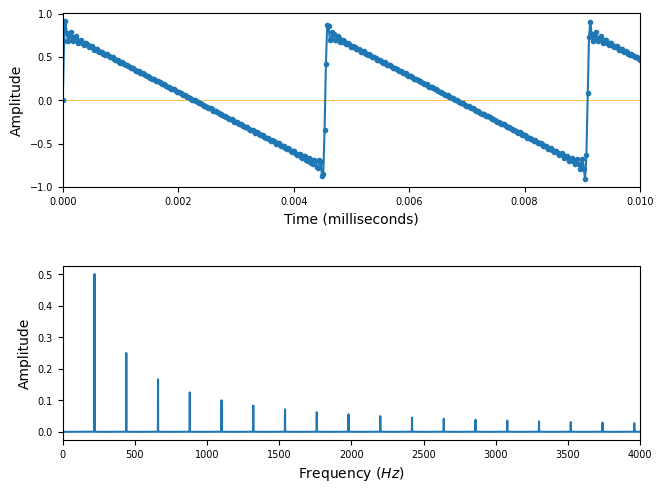

In [15]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(h_pad=4)

# plotting wave form
ax1.hlines(y=0, xmin=0, xmax=0.01, linewidth= 0.5, color='orange')
ax1.plot(timev, sawt, '.-')
ax1.set_xlabel('Time (milliseconds)')
ax1.set_ylabel('Amplitude')
ax1.set_xlim(0, 0.01)

# plotting frequency
ax2.plot(sig_fftn)
ax2.set_xlabel('Frequency ($Hz$)')
ax2.set_ylabel('Amplitude')
ax2.set_xlim(0, 4000)

plt.show()

---

#### **Creating an audio file**

In [8]:
sawt_sound = np.int16(sawt*32767)       # converting values into 16 bit intengers

write('sawtooth.wav', 44100, sawt_sound)
Audio(data='sawtooth.wav')